In [17]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)




# Data set cleaned for Covid-19 modelling

the file COVED_small_flat_table has to be generated via the NOTEBOOK DATA PREPARATION

Goal of the exercise a dynamic dashboard of the last cell in the notebook, where one can select the fit for different countries

Fit of SIR model for Germany cases


In [27]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format


df_analyse=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True)
df_analyse.tail()


,date,Italy,US,Spain,Germany,India,Australia,Japan
911,2022-07-21,20467349,90200438,13132159,30239122,43847065,9018965,10800103
912,2022-07-22,20539016,90367064,13204863,30331131,43868476,9065275,10995193
913,2022-07-23,20608190,90390185,13204863,30331133,43888755,9103321,11196063
914,2022-07-24,20660065,90410386,13204863,30331133,43905621,9136110,11372555
915,2022-07-25,20684182,90567290,13204863,30476605,43920451,9185736,11499018


# Simulative approach to calculate SIR curves

# Fitting data to a model

## step one: always start on simulative / constructive data

Goal is to fit a data model (SIR) model to obtain the parameters
beta and gamma

step one: always start on simulative / constructive data
step two: cross check if the innerlogic of your parameter fitting is correct

In [19]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [20]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI


# Fitting the parameters of SIR model
the SIR model is assuming a very simplistic curve
however we can find situations (time windows) where the model might apply

In [21]:
Start_index = 40
End_index = 190

In [22]:
df_covid = pd.read_csv('../data/raw/owid-covid-data.csv', ';')
df_covid.head()

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


start infected: 120
cumulative sum of invected after period 282641
Number of days 150
N0 50000000
standard deviation errors :  [0.02030405 0.02020608]  start infect: 120
Optimal parameters: beta = 0.7100895215767946  and gamma =  0.629180572459916


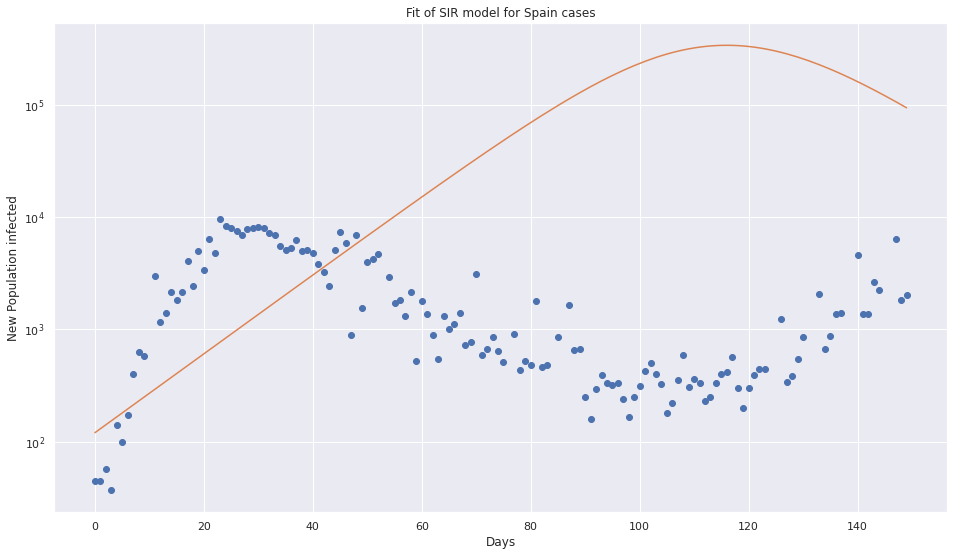

Optimal parameters: beta = 0.7100895215767946  and gamma =  0.629180572459916
Basic Reproduction Number R0  1.1285941630405842
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [23]:
ydata_sp = np.array(df_analyse['Spain'][Start_index:End_index])
t_sp=np.arange(len(ydata_sp))
N0_sp=50000000

I0_sp=ydata_sp[0]
S0_sp=N0_sp-I0_sp
R0_sp=0
print('start infected:',I0_sp)
print('cumulative sum of invected after period',ydata_sp[-1])
print('Number of days',len(ydata_sp))
print('N0',N0_sp)

#beta_It = 0.5
#gamma_It = 0.2
def SIR_model_t_sp(SIR,t_sp,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0_sp       #S*I is the 
    dI_dt=beta*S*I/N0_sp-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

def fit_odeint_sp(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t_sp, (S0_sp, I0_sp, R0_sp), t_sp, args=(beta, gamma))[:,1] # we only would like to get dI

popt_sp, pcov_sp = optimize.curve_fit(fit_odeint_sp, t_sp, ydata_sp)
perr_sp = np.sqrt(np.diag(pcov_sp))
    
print('standard deviation errors : ',str(perr_sp), ' start infect:',ydata_sp[0])
print("Optimal parameters: beta =", popt_sp[0], " and gamma = ", popt_sp[1])

# get the final fitted curve / predict the outcome 
fitted_sp=fit_odeint_sp(t_sp, *popt_sp)

plt.semilogy(t_sp,np.ediff1d(ydata_sp, to_begin=ydata_sp[1]-ydata_sp[0]), 'o')
plt.semilogy(t_sp, fitted_sp)

plt.title("Fit of SIR model for Spain cases")
plt.ylabel("New Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt_sp[0], " and gamma = ", popt_sp[1])
print("Basic Reproduction Number R0 " , popt_sp[0]/ popt_sp[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")


In [ ]:
# %load src/visualization/visualize.py
import pandas as pd
import numpy as np
import dash
import io
import base64

dash.__version__
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State
import mpld3

import plotly.graph_objects as go

import os
print(os.getcwd())
    

#df_input_large=pd.read_csv('data/processed/COVID_final_set.csv',sep=';')
df_input_large=df_analyse
df_covid = pd.read_csv('../data/raw/owid-covid-data.csv', ';')
#data_dict = {'Spain':[ydata_sp, fitted_sp, t_sp], 'Germany': [ydata, fitted, t], 'US': [ydata_us, fitted_us, t_us], 'Italy': [ydata_It, fitted_It, t_It],
#            'Korea, South': [ydata_sk, fitted_sk, t_sk]}
fig = go.Figure()
#countries = [country.lower() for country in df_covid['location']]


app = dash.Dash()
app.layout = html.Div([

    dcc.Markdown('''
    #  SIR Modeling on Covid-19 Data
    Initial records from 40-150 days are taken into consideration as it 
    can be well represented with the SIR model considering it as the first wave
    '''),

    dcc.Markdown('''
    ## Select Country for visualization
    '''),


    dcc.Dropdown(
        id='country_drop_down',
        options=[ {'label': each,'value':each} for each in df_analyse.columns[1:].unique()],
        value=['Germany', 'India', 'US'], # which are pre-selected
        multi=True
    ),

    dcc.Graph(figure=fig, id='main_window_slope')
    #html.Iframe(
    #id = 'main_window_slope',
    #value = None,
    #style = {}
    #)
])

#N0=0
#I0=0
#S0=0
#R0=0
#t = 0
@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    #plt.semilogy(t, ydata, 'o')
    #plt.semilogy(t, fitted)
    #traces = []
   # print(f'country {country}')
   # print(f'type(country) {type(country)}')
    traces = []
    for country in country_list:
        ydata_sp = np.array(df_analyse[country][Start_index:End_index])
        t_sp=np.arange(len(ydata_sp))
    
        if(country == 'US'):
            country = 'United States'
        elif(country == 'Korea, South'):
            country = 'South Korea'
        #print(df_covid['location'].unique())
        df_country = df_covid[df_covid['location'] == country]
        population = int(df_country['population'].iloc[0] * 0.1)
        #print(f'population {population}')
        global I0_sp, S0_sp, R0_sp, N0_sp
        N0_sp=population

        I0_sp=ydata_sp[0]
        S0_sp=N0_sp-I0_sp
        R0_sp=0
    
        popt_sp, pcov_sp = optimize.curve_fit(fit_odeint_sp, t_sp, ydata_sp)
        perr_sp = np.sqrt(np.diag(pcov_sp))
    
        print('standard deviation errors : ',str(perr_sp), ' start infect:',ydata_sp[0])
        print("Optimal parameters: beta =", popt_sp[0], " and gamma = ", popt_sp[1])

        # get the final fitted curve / predict the outcome 
        fitted_sp=fit_odeint_sp(t_sp, *popt_sp)
    
        traces.append(dict(x=t_sp,
                       y=np.ediff1d(ydata_sp, to_begin=ydata_sp[1]-ydata_sp[0]),
                       #y=data_dict[country][0],
                                #y=fitted,
                                #y = [np.ediff1d(ydata, to_begin=ydata[1]-ydata[0]), fitted], 
                                mode='markers',
                                opacity=0.9,
                                name='Cases in '+ country
                                #log_x=True
                        ))
        traces.append(dict(x=t_sp,#y=np.ediff1d(ydata, to_begin=ydata[1]-ydata[0]),
                                y=fitted_sp,
                                #y = [np.ediff1d(ydata, to_begin=ydata[1]-ydata[0]), fitted], 
                                mode='lines',
                                opacity=0.9,
                                name='SIR fitted Curve ' + country 
                                
                        ))
    my_yaxis={'type':"log",
               'title':'New Population infected'
              }

    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,

                xaxis={'title':'Days',
                        'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                      },
                
                #log_x=True

                yaxis=my_yaxis
        )
    }
    
    
    

if __name__ == '__main__':

    app.run_server(debug=True, use_reloader=False)


/home/a8hik/TUK/EDS/eds_covid_analysis/notebooks
Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
standard deviation errors :  [0.00812755 0.00797052]  start infect: 150
Optimal parameters: beta = 0.33102559432334433  and gamma =  0.2524534053567115


/home/a8hik/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/integrate/odepack.py:247: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

/home/a8hik/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning:

overflow encountered in double_scalars

/home/a8hik/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning:

overflow encountered in double_scalars

/home/a8hik/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning:

overflow encountered in double_scalars

/home/a8hik/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning:

invalid value encountered in double_scalars



standard deviation errors :  [0.009877   0.00965103]  start infect: 5
Optimal parameters: beta = 0.7152249881389833  and gamma =  0.6183375157758663
standard deviation errors :  [0.00422396 0.00396165]  start infect: 55
Optimal parameters: beta = 0.2151849197567503  and gamma =  0.11824291635464183
standard deviation errors :  [0.00812755 0.00797052]  start infect: 150
Optimal parameters: beta = 0.33102559432334433  and gamma =  0.2524534053567115
standard deviation errors :  [4.67334944e-02 1.93678685e-09]  start infect: 55
Optimal parameters: beta = 0.9719583998097323  and gamma =  0.8417449459589428
standard deviation errors :  [0.00812755 0.00797052]  start infect: 150
Optimal parameters: beta = 0.33102559432334433  and gamma =  0.2524534053567115
standard deviation errors :  [0.009877   0.00965103]  start infect: 5
Optimal parameters: beta = 0.7152249881389833  and gamma =  0.6183375157758663
